In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
scheme = {'blue':'#2f788e', 'red':'#d15b4f', 'green':'#45b563', 'grey':'#8a8888'}

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'Arial'

In [8]:
def getFrequencies(df, count_col, seq_col):
    
    seqlen = len(df.iloc[0][seq_col])
    dct_counts = {'A':[0 for i in range(0, seqlen)], 'T':[0 for i in range(0, seqlen)], 'G':[0 for i in range(0, seqlen)], 'C':[0 for i in range(0, seqlen)]}

    for c, s in zip(df[count_col], df[seq_col]):
        for i in range(0, seqlen):
            dct_counts[s[i]][i] += c
            
    df_counts = pd.DataFrame(dct_counts)
    df_frequencies = df_counts/df[count_col].sum()
    return df_frequencies.to_dict()

In [9]:
def prepDataset(d, parent=None):
    df = pd.read_csv(d, names=['count', 'seq'], sep='\t')
    df = df.loc[[True if 'N' not in s else False for s in df['seq']]]
    df['f_obs'] = df['count'] / df['count'].sum()
    return df

In [10]:
def getPrediction(F, s):
    return np.prod(np.array([F[s[i]][i] for i in range(0, len(s))]))

In [11]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [12]:
aurora_strc_positions_0 = [3,5,10,11,13,14,15,16,21,22,25,26,27,28,29,33,36,39,41,42,43,44,45,46]
aurora_ctrl_positions_0 = [1,3,8,10,11,13,18,19,20,22,26,27,28,29,30,32,33,35,36,37,38,40,43,46]

---
### Prep the Km and activity and CPM

In [13]:
df_init = pd.read_csv('../../datasets/datasets_prepped/strc_init.csv', usecols=['varseq', 'cpm', 'count'])
df_select = pd.read_csv('../../datasets/datasets_prepped/strc_km.csv', usecols=['varseq', 'cpm', 'count'])

In [14]:
dct_snfq = getFrequencies(df_init, 'count', 'varseq')
df_select['f_obs'] = df_select['count'] / df_select['count'].sum()
df_select['f_exp'] = [getPrediction(dct_snfq, s) for s in df_select['varseq']]
df_select['enrichment'] = df_select['f_obs'] / df_select['f_exp']

In [15]:
df_tested = pd.read_csv('tested_seqs_km.txt', sep='\t', usecols=['seq', 'activity'])
df_tested['varseq'] = [''.join([s[x] for x in aurora_strc_positions_0]) for s in df_tested['seq']]

In [16]:
df_merged_km = df_tested.merge(df_select, on='varseq', how='left')

In [17]:
df_merged_ctrl = pd.read_csv('tested_seqs_ctrl_fluorescence.txt', sep='\t')

In [18]:
df_ctrl = pd.read_csv('../../datasets/datasets_prepped/ctrl_km.csv', usecols=['cpm', 'count', 'seq'])
ctrl_size = df_ctrl['count'].sum()

In [19]:
df_merged_ctrl['cpm'] = (df_merged_ctrl['count'] / ctrl_size) * 1000000

In [20]:
#df_select = df_select.sort_values('enrichment', ascending=False).reset_index(drop=True)

In [23]:
df_merged_ctrl.to_csv('df_merged_ctrl.csv')
df_merged_km.to_csv('df_merged_strc.csv')

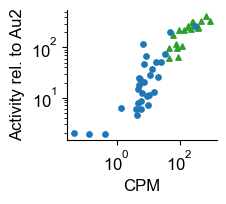

In [28]:

# Define absolute axis size in inches
axis_width = 1.5  # Width in inches
axis_height = 1.3  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
ax.scatter(df_merged_ctrl['cpm'], df_merged_ctrl['activity'], color='tab:green', marker='^', s=15)
ax.scatter(df_merged_km['cpm'], df_merged_km['activity'], color='tab:blue', s=15)


plt.yscale('log')
plt.xscale('log')

#ax.set_xlim(0, 10)
#ax.set_ylim(-1, 1)

plt.xlabel('CPM')
plt.ylabel('Activity rel. to Au2')

sns.despine()
plt.savefig('cpm_vs_activity_strc_km_anc_ctrl.svg')

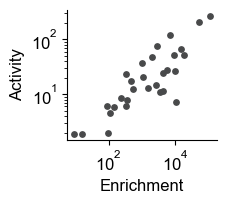

In [17]:

# Define absolute axis size in inches
axis_width = 1.5  # Width in inches
axis_height = 1.3  # Height in inches

# Define margins
left_margin = 0.5
bottom_margin = 0.5

# Compute figure size to ensure fixed axis size
fig_width = left_margin + axis_width + 0.5
fig_height = bottom_margin + axis_height + 0.5

fig = plt.figure(figsize=(fig_width, fig_height))

# Manually place the axes (left, bottom, width, height) in figure coordinates (0-1 range)
ax = fig.add_axes([
    left_margin / fig_width,
    bottom_margin / fig_height,
    axis_width / fig_width,
    axis_height / fig_height
])

# Plot
ax.scatter(df_merged_km['enrichment'], df_merged_km['activity'], color='#48494a', s=15)

plt.yscale('log')
plt.xscale('log')

#ax.set_xlim(0, 10)
#ax.set_ylim(-1, 1)

plt.xlabel('Enrichment')
plt.ylabel('Activity')

sns.despine()
plt.savefig('enrichment_vs_activity_strc_km.svg')